In [1]:
import numpy as np
import matplotlib.pyplot as plt

def scatter(X, Y, ax=plt):
	ax.scatter(X, Y, color="#d3d3d3", alpha=0.9, s=5)

def lineplot(X, Y, color="darkred", ax=plt):
	ax.plot(X, Y, color=color, linewidth=0.7)

# Task 1
Let $f(\mathbf{\theta}) = \| \mathbf{y} - X \mathbf{\theta} \|_2^2$ be the loss function. We differentiate with respect to $\theta$.
$$
\frac{\partial f}{\partial \mathbf{\theta}} = \frac{\partial}{\partial \mathbf{\theta}} (\mathbf{y} - X \mathbf{\theta})^T (\mathbf{y} - X \mathbf{\theta}) = -2 X^T (\mathbf{y} - X \mathbf{\theta})
$$

Setting this derivative to zero (since we're minimizing), we have:
$$
-2 X^T (\mathbf{y} - X \mathbf{\theta}) = 0
$$

Multiplying by $-\frac{1}{2}$ to simplify, we get:
$$
X^T X \mathbf{\theta} = X^T \mathbf{y}
$$

This is the normal equation, and solving it gives us the coefficients $ \mathbf{\theta} $.


In [2]:
def polyfit(X, y, degree):
    V = np.vander(X, degree + 1)
    left = (V.T @ V); right = V.T @ y
    Θ = np.linalg.solve(left, right)
    return V @ Θ

# Task 2


In [3]:
def wpolyfit(w, degree):
	def fitpredict(X, y):
		W = np.diag(w)
		V = np.vander(X, degree + 1)
		left = (V.T @ W @ V); right = V.T @ W @ y
		Θ = np.linalg.solve(left, right)
		return V @ Θ
	return fitpredict

## Generate data

In [4]:
from scipy import special as benchmarks
X = np.linspace(-0.99, 0.99, 100)
def fit(model, targetf = lambda x: x, error_std = .05, X = np.linspace(-0.99, 0.99, 100)):
	np.random.seed(123)
	ȳ = targetf(X) + np.random.normal(0, error_std, len(X))
	# y = wpolyfit(X, ȳ, weightf(np.arange(len(X))), degree)
	y = model(X, ȳ)
	plt.figure(figsize=(10,4))
	plt.title(f"MSE:{(y - ȳ) @ (y - ȳ).T}")
	scatter(X, ȳ)
	lineplot(X, targetf(X), color="grey")
	lineplot(X, y)
	

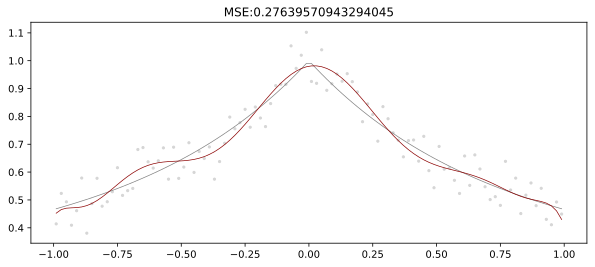

In [5]:
weights = np.ones(len(X))
fit(wpolyfit(weights, 10), targetf = benchmarks.i0e, X = X)

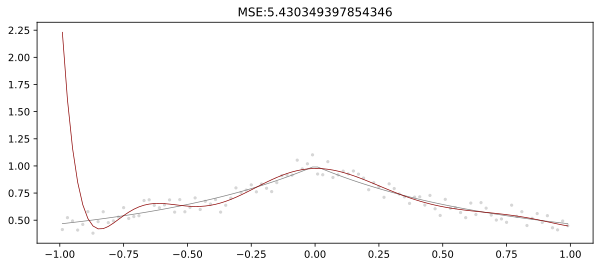

In [6]:
weights = 1 - np.arange(len(X))**2
fit(wpolyfit(weights, 10), targetf = benchmarks.i0e)

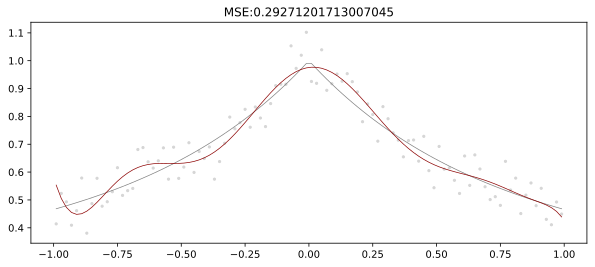

In [7]:
weights = 1 + np.arange(len(X))
fit(wpolyfit(weights, 10), targetf = benchmarks.i0e)

# Task 3

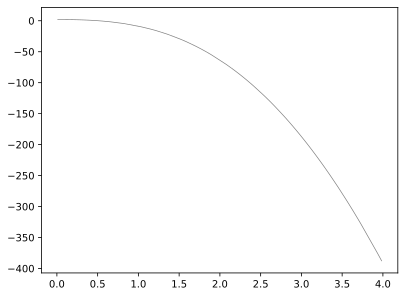

In [8]:
X = np.sort(np.random.uniform(0, 4, 100))
ȳ = 0.5*X**4 + -7.1*X**3 - 4.2*X**2 + 2
lineplot(X, ȳ, color="grey")

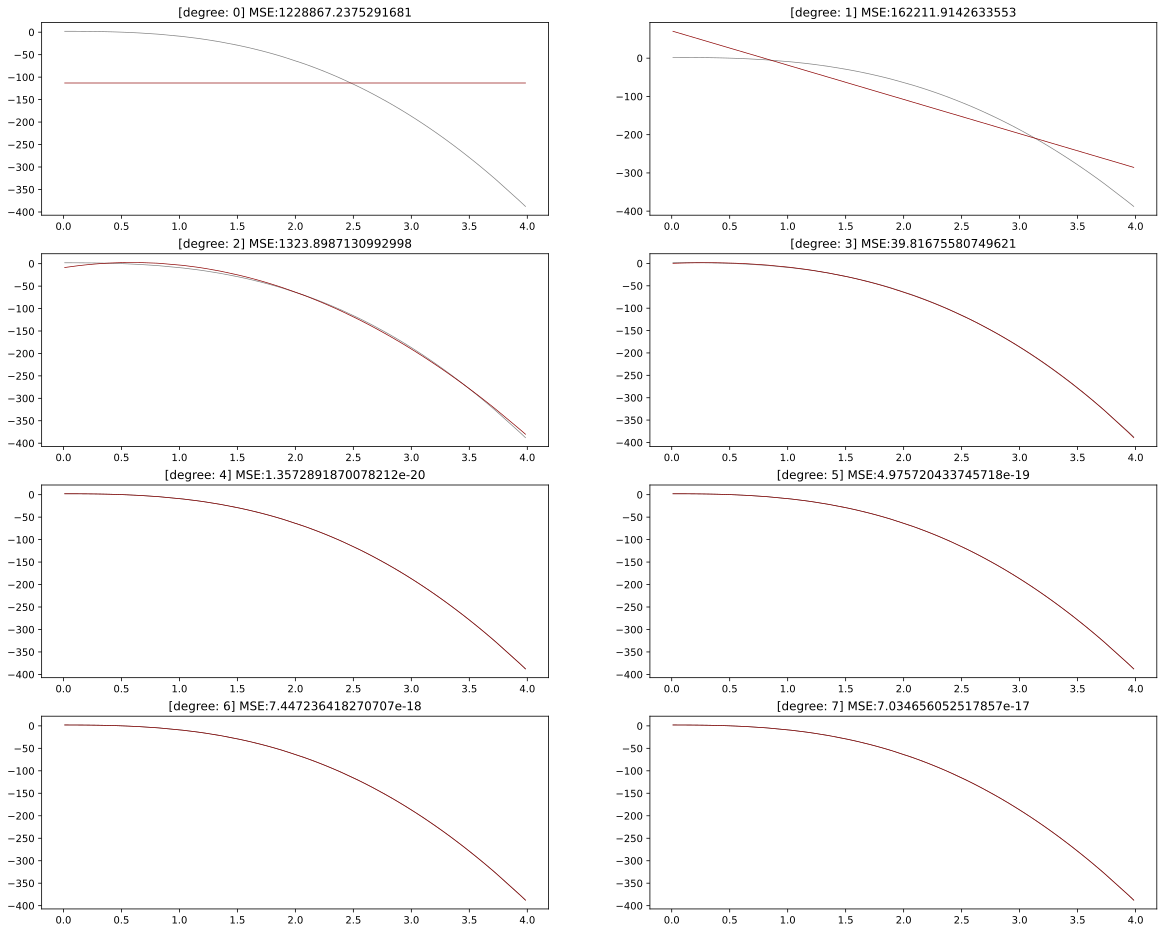

In [9]:
fig, axs = plt.subplots(4, 2, figsize=(20, 16))
for i, ax in enumerate(axs.ravel()):
	y = polyfit(X, ȳ, i)
	ax.set_title(f"[degree: {i}] MSE:{(y - ȳ) @ (y - ȳ).T}")
	lineplot(X, ȳ, color="grey", ax=ax)
	lineplot(X, y, ax=ax)

# Task 4

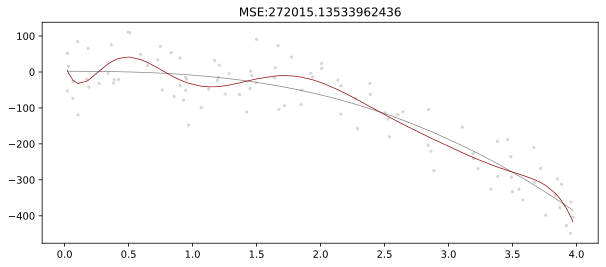

In [10]:
X = np.sort(np.random.uniform(0, 4, 100))
weights = np.ones(len(X))
fit(wpolyfit(weights, 10), targetf=lambda X: 0.5*X**4 + -7.1*X**3 - 4.2*X**2 + 2, X=X, error_std=50)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
transform = lambda X: PolynomialFeatures(degree=10).fit_transform(X.reshape(-1, 1))
lasso = lambda alpha: lambda X, ȳ: Lasso(alpha=alpha).fit(transform(X), ȳ).predict(transform(X))
ridge = lambda alpha: lambda X, ȳ: Ridge(alpha=alpha).fit(transform(X), ȳ).predict(transform(X))

### Lasso

/home/ventus/.local/lib/python3.10/site-packages/sklearn/base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/ventus/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/ventus/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.574e+05, tolerance: 1.919e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

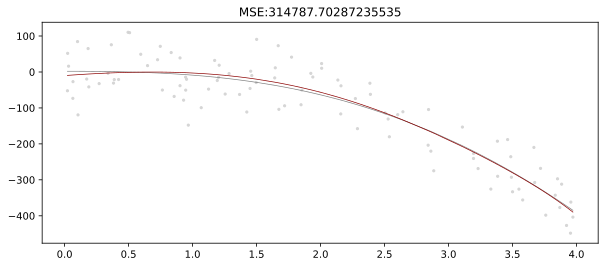

In [23]:
fit(lasso(.0), targetf=lambda X: 0.5*X**4 + -7.1*X**3 - 4.2*X**2 + 2, X=X, error_std=50)

/home/ventus/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.574e+05, tolerance: 1.919e+02
  model = cd_fast.enet_coordinate_descent(


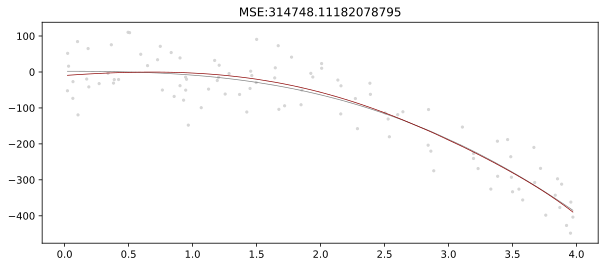

In [24]:
fit(lasso(.01), targetf=lambda X: 0.5*X**4 + -7.1*X**3 - 4.2*X**2 + 2, X=X, error_std=50)

/home/ventus/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.575e+05, tolerance: 1.919e+02
  model = cd_fast.enet_coordinate_descent(


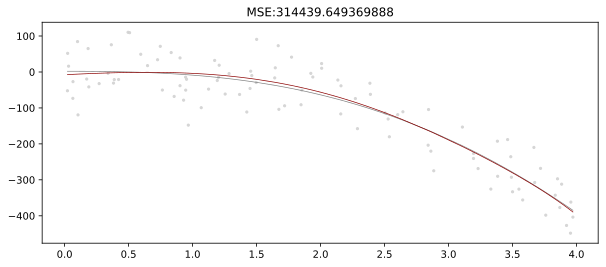

In [25]:
fit(lasso(.1), targetf=lambda X: 0.5*X**4 + -7.1*X**3 - 4.2*X**2 + 2, X=X, error_std=50)

### Ridge

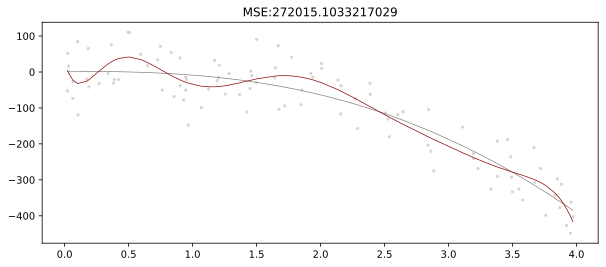

In [22]:
fit(ridge(.0), targetf=lambda X: 0.5*X**4 + -7.1*X**3 - 4.2*X**2 + 2, X=X, error_std=50)

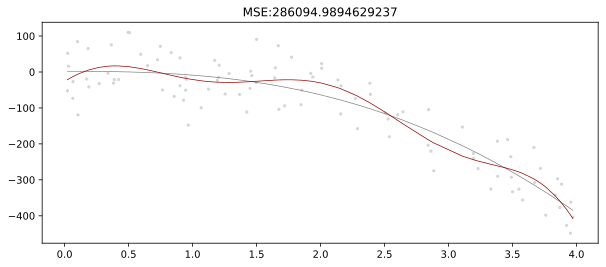

In [26]:
fit(ridge(.01), targetf=lambda X: 0.5*X**4 + -7.1*X**3 - 4.2*X**2 + 2, X=X, error_std=50)

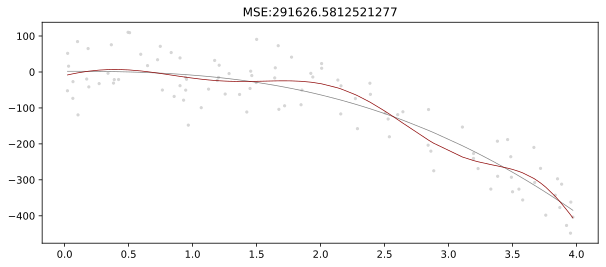

In [27]:
fit(ridge(.1), targetf=lambda X: 0.5*X**4 + -7.1*X**3 - 4.2*X**2 + 2, X=X, error_std=50)

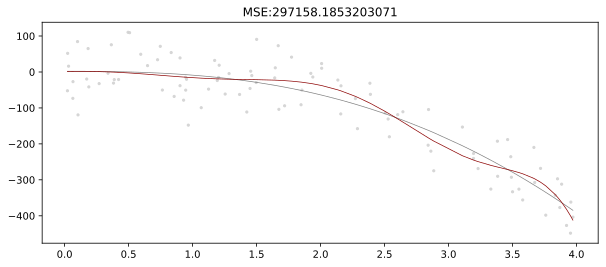

In [34]:
fit(ridge(1), targetf=lambda X: 0.5*X**4 + -7.1*X**3 - 4.2*X**2 + 2, X=X, error_std=50)

# Task 5

In [41]:
import pandas as pd

In [44]:
(connections := pd.read_csv("numopt_lab_3_connections", sep=" ", header=None))

,0,1,2
0,Białystok,Warszawa,198
1,Gdańsk,Warszawa,415
2,Łódź,Warszawa,136
3,Poznań,Warszawa,310
4,Poznań,Szczecin,241
5,Szczecin,Świnoujście,110
6,Poznań,Wrocław,183
7,Opole,Wrocław,98
8,Katowice,Opole,113
9,Katowice,Kraków,83


In [45]:
(members := pd.read_csv("numopt_lab_3_members", sep=" ", header=None))

,0,1
0,Białystok,12
1,Gdańsk,35
2,Katowice,53
3,Kraków,67
4,Łódź,41
5,Opole,11
6,Poznań,29
7,Rzeszów,16
8,Sosnowiec,7
9,Szczecin,23


In [57]:
mapping = list(members[0].to_numpy())

In [76]:
distances = np.zeros((len(members), len(members)))
for id, (a, b, distance) in connections.iterrows():
	ida = mapping.index(a)
	idb = mapping.index(b)
	distances[idb][ida] = distances[ida][idb] = distance

In [78]:
from itertools import product
from numpy import array, fill_diagonal, inf

def FloydWarshall(graph):
	n = len(graph)
	dp = array(graph, dtype=float)
	dp[dp == 0] = inf
	fill_diagonal(dp, 0)

	for k, i, j in product(range(n), range(n), range(n)):
		alt = dp[i, k] + dp[k, j]
		if alt < dp[i, j]:
			dp[i, j] = alt
	return dp

In [79]:
FloydWarshall(distances)

array([[   0.,  613.,  495.,  578.,  334.,  608.,  508.,  744.,  505.,
         749.,  859.,  198.,  691.],
       [ 613.,    0.,  712.,  795.,  551.,  825.,  725.,  961.,  722.,
         966., 1076.,  415.,  908.],
       [ 495.,  712.,    0.,   83.,  433.,  113.,  394.,  249.,   10.,
         635.,  745.,  297.,  211.],
       [ 578.,  795.,   83.,    0.,  516.,  196.,  477.,  166.,   93.,
         718.,  828.,  380.,  294.],
       [ 334.,  551.,  433.,  516.,    0.,  546.,  446.,  682.,  443.,
         687.,  797.,  136.,  629.],
       [ 608.,  825.,  113.,  196.,  546.,    0.,  281.,  362.,  123.,
         522.,  632.,  410.,   98.],
       [ 508.,  725.,  394.,  477.,  446.,  281.,    0.,  643.,  404.,
         241.,  351.,  310.,  183.],
       [ 744.,  961.,  249.,  166.,  682.,  362.,  643.,    0.,  259.,
         884.,  994.,  546.,  460.],
       [ 505.,  722.,   10.,   93.,  443.,  123.,  404.,  259.,    0.,
         645.,  755.,  307.,  221.],
       [ 749.,  966.,  635.,

Meeting in one of the cities